In [6]:
import torch
import torch.optim as optim

# Energy Model

TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

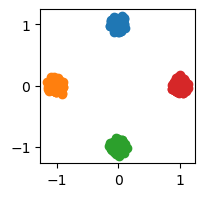

In [9]:
from modules.mlp import MLP
from modules.energy_model import EnergyModel
from utils.data import sample_circular_gmm

data, data_info = sample_circular_gmm(1000, num_modes=4, viz=True)

batch_size = 1000
input_dim = 2
output_dim = 1
mlp = MLP([input_dim, 64, output_dim])
energy_model = EnergyModel(mlp, input_dim)

optimizer = optim.Adam(energy_model.parameters(), lr=1e-3)

for iter in range(5000):
    optimizer.zero_grad()
    data_real = data[torch.randperm(len(data))[:batch_size]]
    data_fake = energy_model.langevin_sampler(data_real, n_steps=1, step_size=0.001).detach()
    loss = -(energy_model(data_real).mean() - energy_model(data_fake).mean())
    loss.backward()
    optimizer.step()
